In [29]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("darkgrid")
sns.set_palette('dark')

data = pd.read_csv('/Users/mkryuchkov10/Desktop/python_data_science/data/NASDAQ 1962-2024.csv')
data['Date'] = pd.to_datetime(data['Date'])


In [55]:
def target_to_table(table, target: str):
    table_pivot = table.pivot(index='Date', columns='Ticker', values=target)
    table_pivot = table_pivot.ffill().bfill()
    return table_pivot

def convert_volume(value):
        if isinstance(value, str):  
            value = value.replace(',', '').strip()
            if 'K' in value:
                return float(value.replace('K', '')) * 1e3
            elif 'M' in value:
                return float(value.replace('M', '')) * 1e6
            elif 'B' in value:
                return float(value.replace('B', '')) * 1e9
            return float(value)
        return value  

def investing2data(path):
    btc = pd.read_csv(
    f'/Users/mkryuchkov10/Desktop/python_data_science/data/{path}',
    thousands=",",
    quotechar='"',
    parse_dates=["Date"],
    dayfirst=False
    )
    btc['ln(price)'] = np.log(btc['Price'] + 1e-10)
    btc['Change %'] = btc['Change %'].str.rstrip('%').astype(float)
    btc.rename(columns={'Date': 'Date', 'Price': 'price', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Vol.': 'volume', 'Change %': 'change'}, inplace=True)
    btc['volume'] = btc['volume'].apply(convert_volume)
    btc['Date'] = pd.to_datetime(btc['Date'], errors='coerce')
    return btc


In [56]:
data_price = target_to_table(table=data, target='Close')
sp500 = investing2data(path='S&P 500 Historical Data.csv')

In [57]:
data_price_sp500 = pd.merge(data_price, sp500, 'inner', 'Date')
data_price_sp500

,Date,NaN,AACG,AACI,AADI,AAGR,AAL,AAME,AAOI,AAON,...,ZVSA,ZYME,ZYXI,price,open,high,low,volume,change,ln(price)
0,2014-01-02,12.050,3.94,9.750,67.500,7.02509,25.360001,3.98,14.630,14.084444,...,3447.500,13.00,0.327273,1832.00,1845.90,1845.90,1827.70,NaN,-0.89,7.513164
1,2014-01-03,12.050,3.93,9.750,67.500,7.02509,26.540001,4.07,14.350,14.080000,...,3447.500,13.00,0.327273,1831.40,1833.20,1838.20,1829.10,NaN,-0.03,7.512836
2,2014-01-06,12.050,3.94,9.750,67.500,7.02509,27.030001,4.03,14.330,13.853333,...,3447.500,13.00,0.318182,1826.80,1832.30,1837.20,1823.70,NaN,-0.25,7.510321
3,2014-01-07,12.050,4.01,9.750,67.500,7.02509,26.910000,4.04,14.740,14.053333,...,3447.500,13.00,0.336364,1837.90,1828.70,1840.10,1828.70,NaN,0.61,7.516379
4,2014-01-08,12.050,4.05,9.750,67.500,7.02509,27.629999,4.01,14.660,14.115556,...,3447.500,13.00,0.354545,1837.50,1837.90,1840.00,1831.40,NaN,-0.02,7.516161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,2024-05-16,0.590,0.91,11.350,1.915,0.38400,14.790000,1.71,11.230,74.860001,...,4.860,9.38,11.000000,5297.10,5310.07,5325.49,5296.19,NaN,-0.21,8.574915
2611,2024-05-17,0.610,0.91,11.460,1.910,0.37000,14.730000,1.71,11.725,74.879997,...,4.487,9.12,10.880000,5303.27,5303.10,5305.45,5283.59,NaN,0.12,8.576079
2612,2024-05-20,0.595,0.91,11.400,1.860,0.34500,14.520000,1.64,12.400,74.980003,...,4.200,8.98,10.560000,5308.13,5305.35,5325.32,5302.40,NaN,0.09,8.576995
2613,2024-05-21,0.584,0.95,11.487,1.850,0.35200,14.030000,1.74,12.000,76.790001,...,4.400,8.91,10.580000,5321.41,5298.69,5324.32,5297.87,NaN,0.25,8.579494


<Axes: xlabel='Date', ylabel='AACI'>

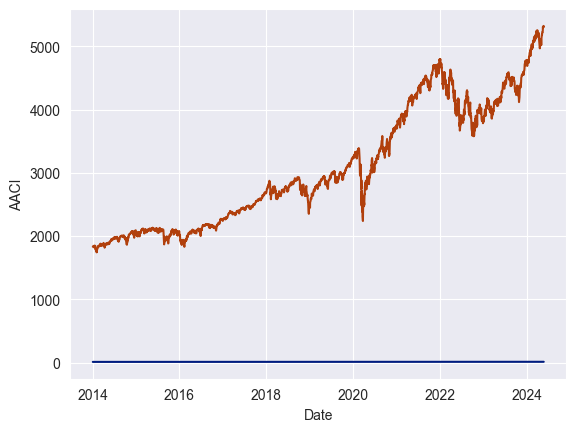

In [64]:
sns.lineplot(data=data_price_sp500, x='Date', y='AACI')
sns.lineplot(data=data_price_sp500, x='Date', y='price')